In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


In [29]:
df = pd.read_csv('HAM10000_metadata.csv')

In [30]:
df.head(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [31]:
df.isna().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [33]:

for col in df.columns[2:]:
    print(f'{df[col].value_counts()}\n------')


dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64
------
dx_type
histo        5340
follow_up    3704
consensus     902
confocal       69
Name: count, dtype: int64
------
age
45.0    1299
50.0    1187
55.0    1009
40.0     985
60.0     803
70.0     756
35.0     753
65.0     731
75.0     618
30.0     464
80.0     404
85.0     290
25.0     247
20.0     169
5.0       86
15.0      77
10.0      41
0.0       39
Name: count, dtype: int64
------
sex
male       5406
female     4552
unknown      57
Name: count, dtype: int64
------
localization
back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: count, dtype: int6

In [34]:
for col in df.columns[2:]:
    print(f'{col}:{df[col].isna().sum()}\n------')

dx:0
------
dx_type:0
------
age:57
------
sex:0
------
localization:0
------


In [35]:
mapping_dx_dic = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign',
    'bcc': 'Basal cell carcunoma',
    'akiec': 'Actinic',
    'vasc': 'vascular',
    'df': 'Demarto'
}

df['diagnose'] = df['dx'].map(mapping_dx_dic.get)

In [36]:
imputer = SimpleImputer(missing_values= np.nan, strategy = 'mean')
car_imputer= imputer.fit(df[['age']])
df['age']= car_imputer.transform(df[['age']]).ravel()

In [37]:
df['age'].value_counts()

age
45.000000    1299
50.000000    1187
55.000000    1009
40.000000     985
60.000000     803
70.000000     756
35.000000     753
65.000000     731
75.000000     618
30.000000     464
80.000000     404
85.000000     290
25.000000     247
20.000000     169
5.000000       86
15.000000      77
51.863828      57
10.000000      41
0.000000       39
Name: count, dtype: int64

In [38]:
label_encoder = preprocessing.LabelEncoder()

In [39]:
df1 = df.copy()

In [40]:
lesion_id_cat = label_encoder.fit_transform(df1['lesion_id'])
lesion_id_cat = pd.DataFrame({'lesion_id_cat': lesion_id_cat})
image_id_cat = label_encoder.fit_transform(df1['image_id'])
image_id_cat = pd.DataFrame({'image_id_cat': image_id_cat})
dx_cat = label_encoder.fit_transform(df1['dx'])
dx_cat = pd.DataFrame({'dx_cat': dx_cat})
dx_type_cat = label_encoder.fit_transform(df1['dx_type'])
dx_type_cat = pd.DataFrame({'dx_type_cat': dx_type_cat})
sex_cat = label_encoder.fit_transform(df1['sex'])
sex_cat = pd.DataFrame({'sex_cat': sex_cat})
localization_cat = label_encoder.fit_transform(df1['localization'])
localization_cat = pd.DataFrame({'localization_cat': localization_cat})
diagnose_cat = label_encoder.fit_transform(df1['diagnose'])
diagnose_cat = pd.DataFrame({'diagnose_cat': diagnose_cat})

In [41]:
df1.lesion_id = lesion_id_cat
df1.image_id = image_id_cat
df1.dx = dx_cat
df1.dx_type = dx_type_cat
df1.sex = sex_cat
df1.localization = localization_cat
df1.diagnose = diagnose_cat

Normalization

In [42]:
scaled_feature = df1.copy()

In [43]:
col_names = ['lesion_id','image_id','dx', 'dx_type','age','sex','localization','diagnose']
features = scaled_feature[col_names]

In [44]:
scaler = StandardScaler().fit(features.values)

In [45]:
features = scaler.transform(features.values)

In [46]:
scaled_feature[col_names]= features
scaled_feature.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,diagnose
0,-1.680017,-0.655118,-1.496108,0.835507,1.662953,0.882321,0.847871,-1.343453
1,-1.680017,-1.481453,-1.496108,0.835507,1.662953,0.882321,0.847871,-1.343453
2,-0.474447,-0.879948,-1.496108,0.835507,1.662953,0.882321,0.847871,-1.343453
3,-0.474447,-1.263195,-1.496108,0.835507,1.662953,0.882321,0.847871,-1.343453
4,-1.055837,0.802468,-1.496108,0.835507,1.367434,0.882321,-0.626664,-1.343453


In [47]:
X = scaled_feature.drop(columns=['diagnose'], axis= 1)
y = df.dx

In [48]:
y = [1 if each == 'bkl' or each == 'nv' or each == 'df' else 0 for each in df.dx]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

SVM

In [50]:
from sklearn.svm import SVC

In [51]:
model_svc = SVC()

In [52]:
model_svc.fit(X_train,y_train)
y_pred_svc = model_svc.predict(X_test)

report_SVC = classification_report(y_test, y_pred_svc)

In [53]:
accuracy_score_SVC = accuracy_score(y_test,y_pred_svc)
print(accuracy_score_SVC)

0.9805292061907139


In [54]:
print(report_SVC)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       409
           1       0.99      0.99      0.99      1594

    accuracy                           0.98      2003
   macro avg       0.97      0.97      0.97      2003
weighted avg       0.98      0.98      0.98      2003



Multi_class Classification using SVC 'rbf' kernel

In [55]:
mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
print(mapping)

{0: 'Actinic', 1: 'Basal cell carcunoma', 2: 'Benign', 3: 'Demarto', 4: 'Melanocytic nevi', 5: 'Melanoma', 6: 'vascular'}


In [56]:
'''
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign',
    'bcc': 'Basal cell carcunoma',
    'akiec': 'Actinic',
    'vasc': 'vascular',
    'df': 'Demarto'
'''

"\n    'nv': 'Melanocytic nevi',\n    'mel': 'Melanoma',\n    'bkl': 'Benign',\n    'bcc': 'Basal cell carcunoma',\n    'akiec': 'Actinic',\n    'vasc': 'vascular',\n    'df': 'Demarto'\n"

In [57]:
TARGET_COL = 'diagnosis' if 'diagnosis' in df1.columns else 'diagnose'

In [58]:
X_2 = df1.drop(columns=[TARGET_COL]).values
y_2 = df1[TARGET_COL].astype(str).values

In [59]:
label_encoder_2 = preprocessing.LabelEncoder()
y_2 = label_encoder_2.fit_transform(y_2)

In [60]:
# Chia tập, giữ tỷ lệ lớp
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_2, y_2, test_size=0.2, random_state=42, stratify=y
)

In [61]:
# Chuẩn hóa cho SVM
scaler_2 = StandardScaler()
X_train_sc = scaler_2.fit_transform(X_train_2)
X_test_sc  = scaler_2.transform(X_test_2)

In [62]:
# Huấn luyện SVM (đa lớp One-vs-One mặc định của SVC)
clf = SVC(kernel='rbf', C=10.0, gamma='scale', class_weight='balanced', random_state=42)
clf.fit(X_train_sc, y_train_2)

SVC(C=10.0, class_weight='balanced', random_state=42)

In [63]:
# Dự đoán
y_pred = clf.predict(X_test_sc)

In [64]:
# Vẽ classification report theo nhãn
target_names = label_encoder_2.classes_.tolist()
print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

              precision    recall  f1-score   support

           0     0.2073    0.0416    0.0692       409
           1     0.7636    0.0527    0.0986      1594
           2     0.0000    0.0000    0.0000         0
           3     0.0000    0.0000    0.0000         0
           4     0.0000    0.0000    0.0000         0
           5     0.0000    0.0000    0.0000         0
           6     0.0000    0.0000    0.0000         0

    accuracy                         0.0504      2003
   macro avg     0.1387    0.0135    0.0240      2003
weighted avg     0.6500    0.0504    0.0926      2003



c:\Users\DELL.000\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL.000\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL.000\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [65]:
from sklearn.metrics import ConfusionMatrixDisplay

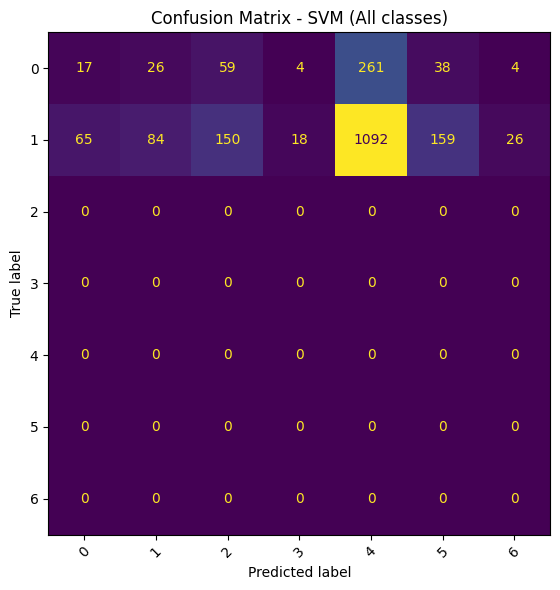

In [66]:
# Confusion Matrix (đếm)
cm = confusion_matrix(y_test, y_pred, labels=np.arange(len(target_names)))
fig, ax = plt.subplots(figsize=(7, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(ax=ax, xticks_rotation=45, values_format='d', colorbar=False)
ax.set_title("Confusion Matrix - SVM (All classes)")
plt.tight_layout()
plt.show()
